In [1]:
#Importación de librerias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

data = pd.read_csv("/content/drive/MyDrive/DATA_TAREAS/base_postgrado_v2.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
data.shape

(13985, 16)

In [4]:
data.head(1)

,id,genero,idgenero,año_ingreso,semestre_trimestre,idprograma,programa,facultad,campus,sede,jornada,duracionprograma,añooportuno,estadoalumno,idestadoalumno,tipoprograma
0,1,Mujer,0,2014,1,IPPG15349,MBA con Especialización en Salud,IPPG,REP,Santiago,Diurna,4,2016,Desertor,0,Magíster


# 4. Describir desafíos

In [5]:
#@title Cuenta duracción del programa
data['duracionprograma'].value_counts()

4     11752
3      1167
26      545
28      403
2       118
Name: duracionprograma, dtype: int64

In [6]:
data.shape

(13985, 16)

In [7]:
 # Datos outliers
 cond1 = data['duracionprograma'] == 26
 cond2 = data['duracionprograma'] == 28
 data = data[~cond1 & ~cond2]
  

In [8]:
data.shape

(13037, 16)

In [9]:
#@title Cuenta Activos y Desertores
data['estadoalumno'].value_counts()

Desertor    8641
Activo      4396
Name: estadoalumno, dtype: int64

In [10]:
 # Desequilibrio del dataset
activos = data[data['estadoalumno'] == 'Activo']
desertores = data[data['estadoalumno'] == 'Desertor'].sample(n=len(activos))
data = pd.concat([desertores, activos])
    

In [11]:
data['estadoalumno'].value_counts()

Activo      4396
Desertor    4396
Name: estadoalumno, dtype: int64

In [12]:
data.head(2)

,id,genero,idgenero,año_ingreso,semestre_trimestre,idprograma,programa,facultad,campus,sede,jornada,duracionprograma,añooportuno,estadoalumno,idestadoalumno,tipoprograma
7614,7615,Hombre,1,2017,1,IPPG35348,MBA con Especialización en Salud,IPPG,REP,Santiago,On Line,4,2019,Desertor,0,Magíster
3903,3904,Mujer,0,2016,2,UNAB29981,Magister en Gestión Pedagógica y Curricular,Educación y Ciencias Sociales,EXT,Santiago,Vespertina,4,2019,Desertor,0,Magíster


In [13]:
columns = ['genero',          
           'semestre_trimestre',
           'programa',
           'facultad',
           'campus',
           'sede',
           'jornada',
           'duracionprograma',       
           'estadoalumno',         
           'año_ingreso']

data = data[columns]
for col in columns:
      data[col] = data[col].astype("category").cat.codes
      

# 3. Presentación de Experimentos

In [14]:
#@title 80% Entrenamiento - 20% Test

data_train, data_test = train_test_split(data, test_size=0.2)
x_train = data_train.drop(labels='estadoalumno', axis=1)
y_train = data_train['estadoalumno']
x_test = data_test.drop(labels='estadoalumno', axis=1)
y_test = data_test['estadoalumno']

In [15]:
len(data_train), len(data_test)

(7033, 1759)

# Entrenamientos de los modelos

* Decision tree
* Random Forest
* SVM

In [16]:
# definicion de la funcion para evaluar los modelos

def evaluar_predicciones(y_true, y_pred, x_test, model):
    string = "La precision del modelo es: {}%".format(100*accuracy_score(y_true, y_pred))
    plt.figure(figsize=(12, 7))
    plot_confusion_matrix(model, x_test, y_test)
    plt.title(string, fontsize='15')
    plt.show()
    
    return round(100*accuracy_score(y_true, y_pred), 3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 864x504 with 0 Axes>

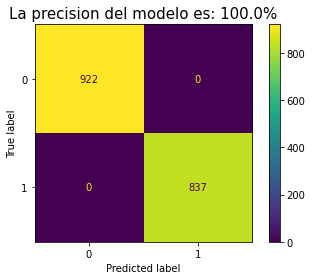

In [17]:
#@title Decision tree
clf_desicion_tree = DecisionTreeClassifier()
clf_desicion_tree.fit(x_train, y_train)
y_pred = clf_desicion_tree.predict(x_test)
resultados_desicion_tree = evaluar_predicciones(y_test, y_pred, x_test, clf_desicion_tree)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 864x504 with 0 Axes>

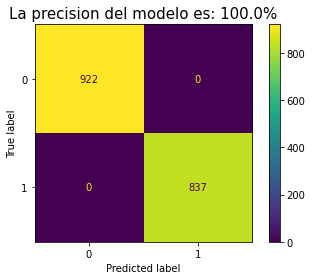

In [18]:
#@title Random Forest
clf_random_forest = RandomForestClassifier()
clf_random_forest.fit(x_train, y_train)
y_pred = clf_random_forest.predict(x_test)
resultados_random_forest = evaluar_predicciones(y_test, y_pred, x_test, clf_random_forest)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 864x504 with 0 Axes>

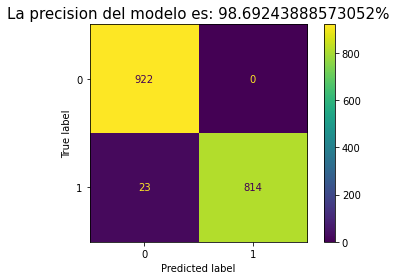

In [19]:
#@title SVM
clf_svm = SVC()
clf_svm.fit(x_train, y_train)
y_pred = clf_svm.predict(x_test)
resultados_svm = evaluar_predicciones(y_test, y_pred, x_test, clf_svm)

In [20]:
#@title Resumen de resultados
resultados = {'modelo': ["Descion Tree", "Random Forest", "SVM"],
              'score': [resultados_desicion_tree,
                         resultados_random_forest,
                         resultados_svm]}

res = pd.DataFrame(resultados)
res

,modelo,score
0,Descion Tree,100.000
1,Random Forest,100.000
2,SVM,98.692


**Hiperparametros**

In [21]:
clf_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [22]:
clf_random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [23]:
clf_desicion_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}